In [1]:
import math as mt
import numpy as np
from matplotlib import pyplot as py

In [2]:
N = 50
xstart, xend, ystart, yend = -2.0, 2.0, -1.0, 1.0
x = np.linspace(xstart,xend,N)
y = np.linspace(ystart,yend,N)

X,Y = np.meshgrid(x,y)

print('x = ',x)
print('y = ',y)

x =  [-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]
y =  [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.

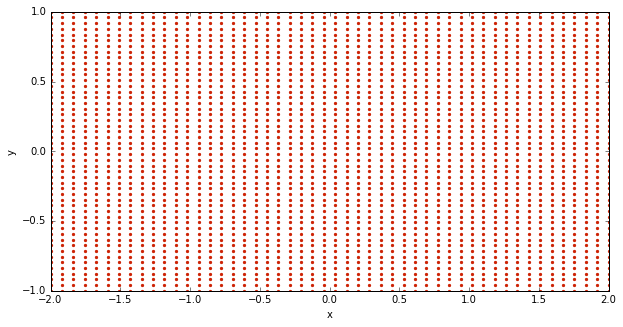

In [3]:
%matplotlib inline

size = 10
py.figure(figsize=(size , (yend - ystart)/(xend-xstart)*size))
py.xlabel ('x')
py.ylabel ('y')
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.scatter(X,Y,s = 5, color = '#CD2305', marker = 'o')


In [4]:
#Source
## Initialization
strengthsource = 5.0
xsource , ysource = -1.0,0.0

## Computing the velocity field
usource = strengthsource/(2*mt.pi) * (X-xsource)/((X-xsource)**2+(Y-ysource)**2)
vsource = strengthsource/(2*mt.pi) * (Y-ysource)/((X-xsource)**2+(Y-ysource)**2)

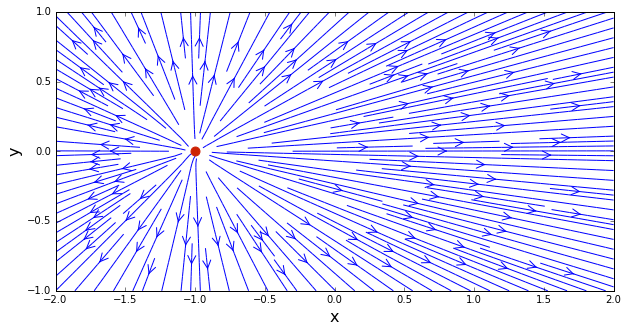

In [5]:
## Plotting the streamlines

size = 10
py.figure(figsize=(size , (yend - ystart)/(xend - xstart) * size))
py.xlabel ('x', fontsize = 16)
py.ylabel ('y', fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,usource,vsource,density = 2, linewidth = 1, arrowsize = 2, arrowstyle = '->')
py.scatter(xsource,ysource,s = 80, color = '#CD2305', marker = 'o')


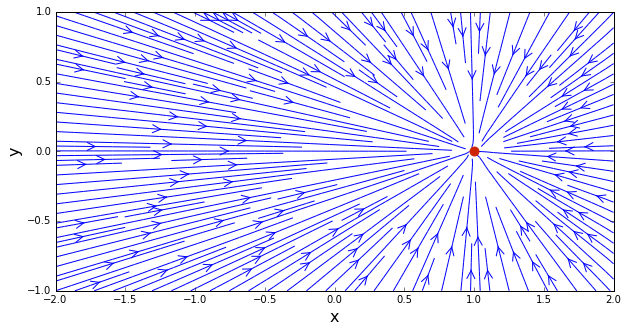

In [6]:
# Sink
strengthsink = -5.0
xsink,ysink = 1.0,0.0

## Compute velocity
usink = strengthsink/(2*mt.pi) * (X-xsink)/((X-xsink)**2+(Y-ysink)**2)
vsink = strengthsink/(2*mt.pi) * (Y-ysink)/((X-xsink)**2+(Y-ysink)**2)

## Plot
size = 10
py.figure(figsize=(size , (yend - ystart)/(xend - xstart) * size))
py.xlabel ('x', fontsize = 16)
py.ylabel ('y', fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,usink,vsink,density = 2, linewidth = 1, arrowsize = 2, arrowstyle = '->')
py.scatter(xsink,ysink,s = 80, color = '#CD2305', marker = 'o')


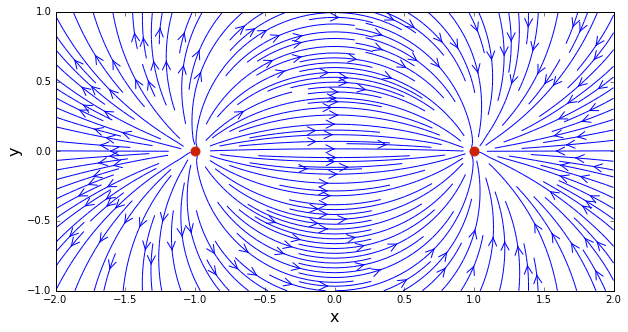

In [7]:
## Source Sink Pair
upair = usource + usink
vpair = vsource + vsink

# Plot
py.figure(figsize=(size , (yend - ystart)/(xend - xstart) * size))
py.xlabel ('x', fontsize = 16)
py.ylabel ('y', fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,upair,vpair,density = 2, linewidth = 1, arrowsize = 2, arrowstyle = '->')
py.scatter([xsource, xsink], [ysource,ysink], s = 80, color = '#CD2305', marker = 'o')

In [8]:
## Adding sink at (0,0.5) of strength -5
xsink2,ysink2 = 0.0,0.5
usink2 = strengthsink/(2*mt.pi) * (X-xsink2)/((X-xsink2)**2+(Y-ysink2)**2)
vsink2 = strengthsink/(2*mt.pi) * (Y-ysink2)/((X-xsink2)**2+(Y-ysink2)**2)

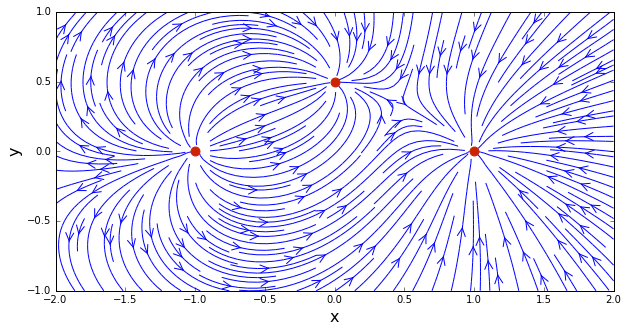

In [9]:
#Plotting triplet

utriplet = upair + usink2
vtriplet = vpair + vsink2

# Plot
size = 10
py.figure(figsize=(size , (yend - ystart)/(xend - xstart) * size))
py.xlabel ('x', fontsize = 16)
py.ylabel ('y', fontsize = 16)
py.xlim(xstart,xend)
py.ylim(ystart,yend)
py.streamplot(X,Y,utriplet,vtriplet,density = 2, linewidth = 1, arrowsize = 2, arrowstyle = '->')
py.scatter([xsource, xsink, xsink2], [ysource,ysink,ysink2], s = 80, color = '#CD2305', marker = 'o')

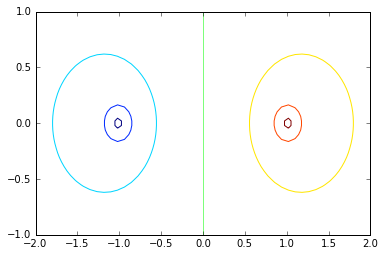

In [12]:
#Challenge Task

phisource = strengthsource/(2*mt.pi) * (np.log(np.abs((X-xsource)**2+(Y-ysource)**2)))
phisink = strengthsink/(2*mt.pi) * (np.log(np.abs((X-xsink)**2 + (Y-ysink)**2)))
phi = phisink + phisource
py.contour (X,Y, phi)